# Import required libraries

In [317]:
pip install category_encoders

In [318]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [319]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,LabelEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)
%matplotlib inline

# Load the data

In [320]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv',encoding= 'unicode_escape')

In [321]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Exploratory Data Analysis (EDA)

## Data types

In [322]:
print ('Shape dataset')
print (df.shape)
print ('\n')
print ('Info Dataset')
print (df.info())
print ('\n')
print ('See if any missing value of Dataset')
print (df.isna().sum())

Shape dataset
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Function

In [323]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

## Missing values

In [324]:
print(df.info())
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [325]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Basic statistics (describe)

In [326]:
# Numeric values
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [327]:
#categorical values
df.describe(include='O').T

,count,unique,top,freq
Date,8760,365,16/10/2018,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


(array([ 112.,  417.,  809., 1180., 1234., 1194., 1569., 1354.,  717.,
         174.]),
 array([-17.8 , -12.08,  -6.36,  -0.64,   5.08,  10.8 ,  16.52,  22.24,
         27.96,  33.68,  39.4 ]),
 <a list of 10 Patch objects>)

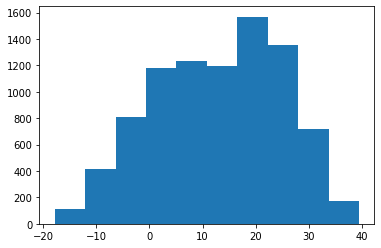

In [328]:
plt.hist(df['Temperature(°C)'])

## Data visualization

In [329]:
# Let's extract new columns (day of the week, day of the month, hour, month, season, year etc.) by using new index.
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [330]:
#Functioning Day is whether the bike is working on that or not
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [331]:
df.drop(df.loc[df['Functioning Day']=='No'].index, inplace=True)

In [332]:
df['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


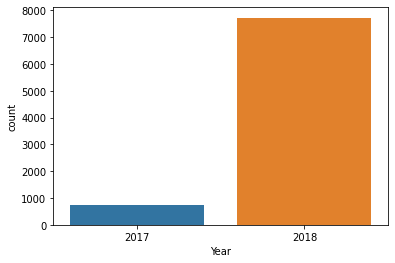

In [333]:
print(sns.countplot(x="Year", data=df));

AxesSubplot(0.125,0.125;0.775x0.755)


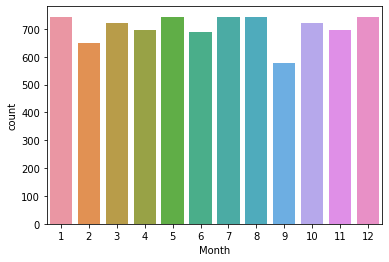

In [334]:
print(sns.countplot(x="Month", data=df))

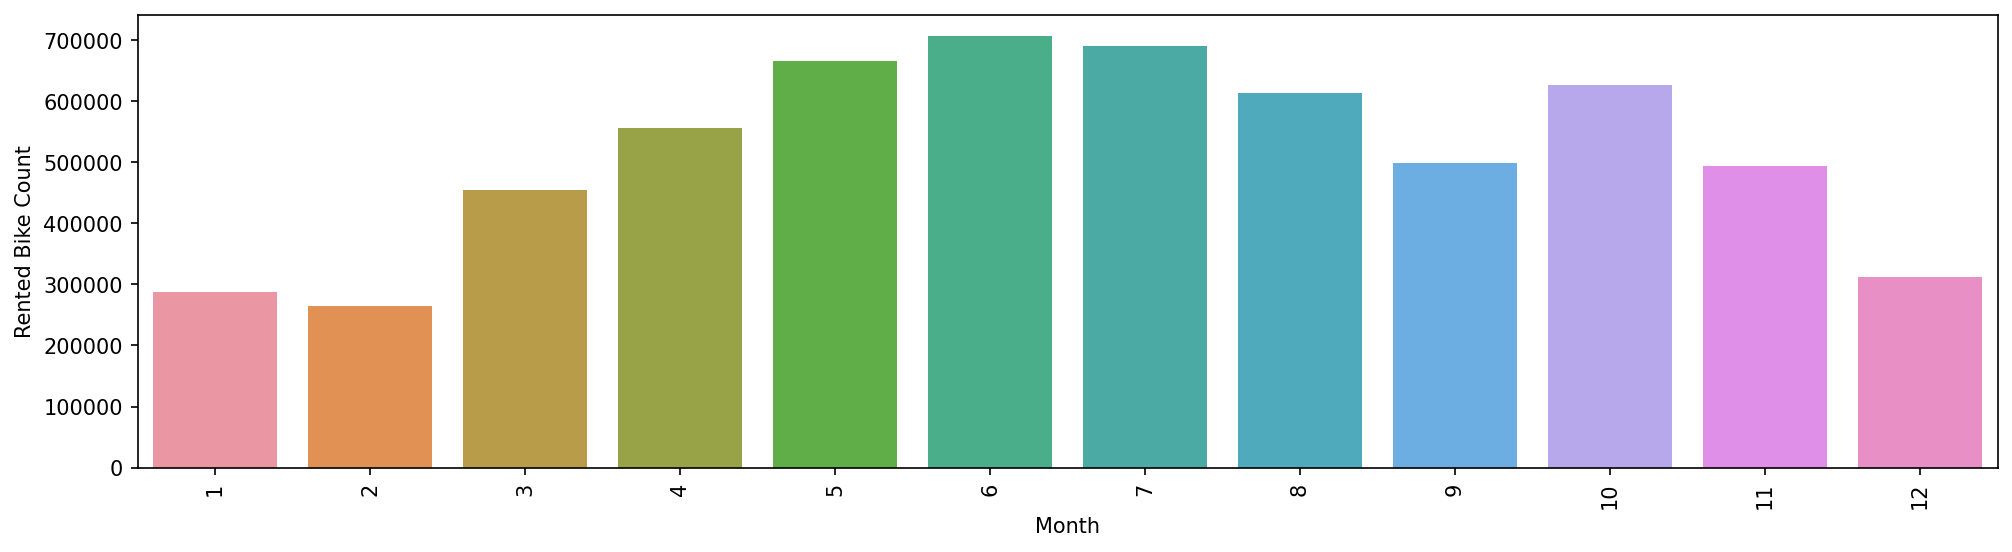

In [335]:
Month = df.groupby("Month").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

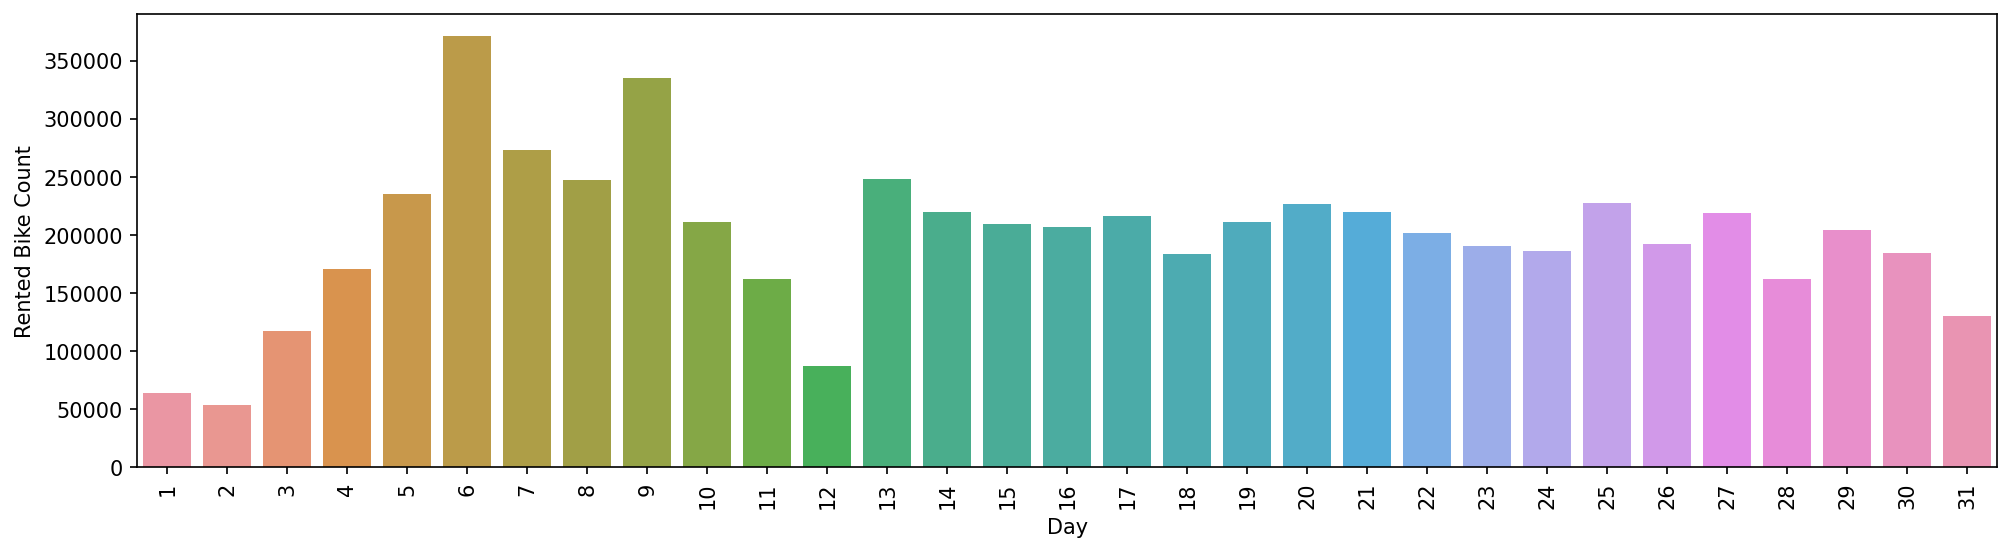

In [336]:
Day = df.groupby("Day").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.xticks(rotation=90);

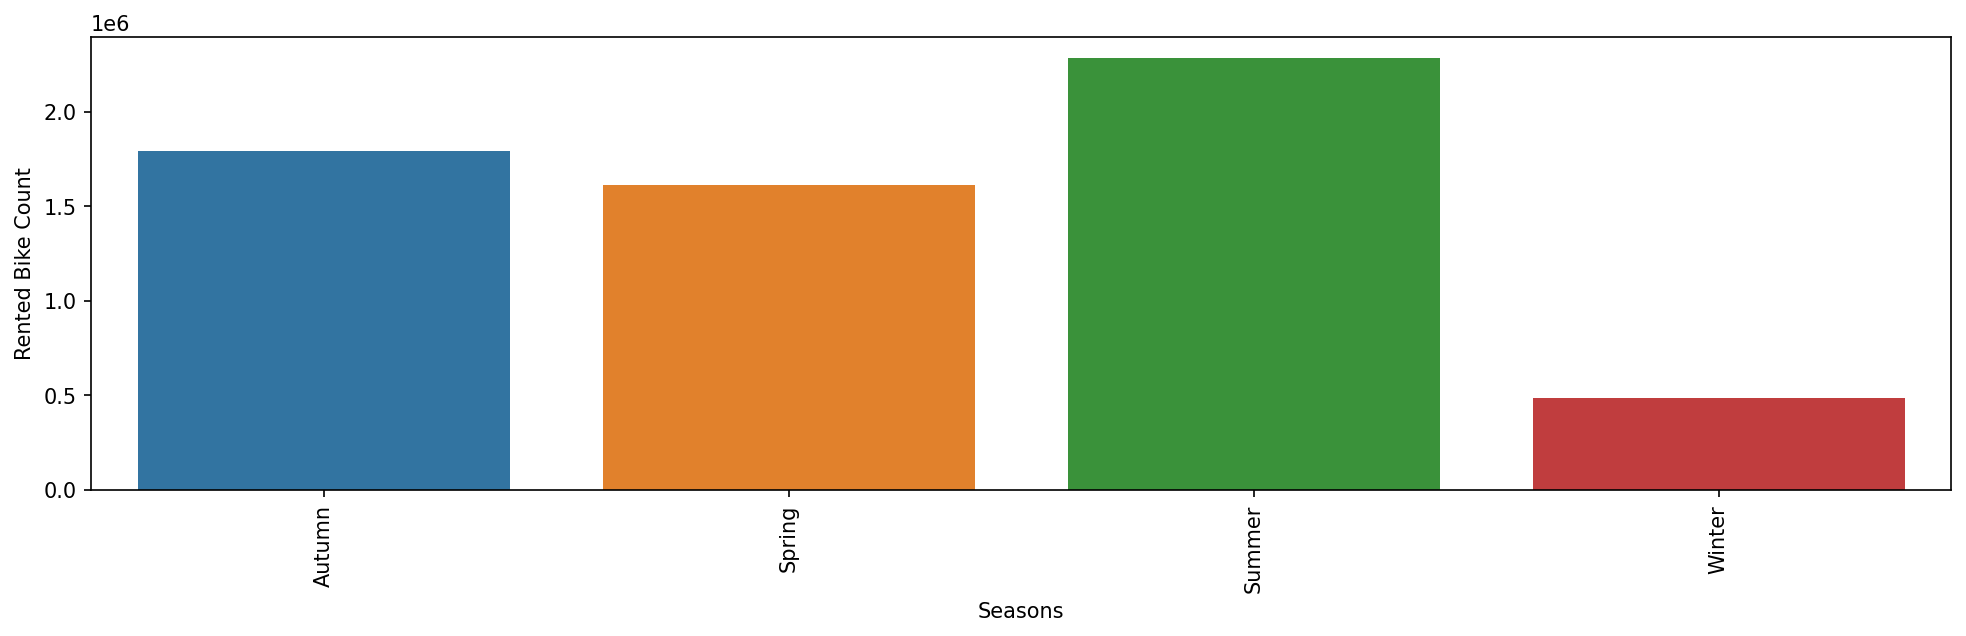

In [337]:
Season = df.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);

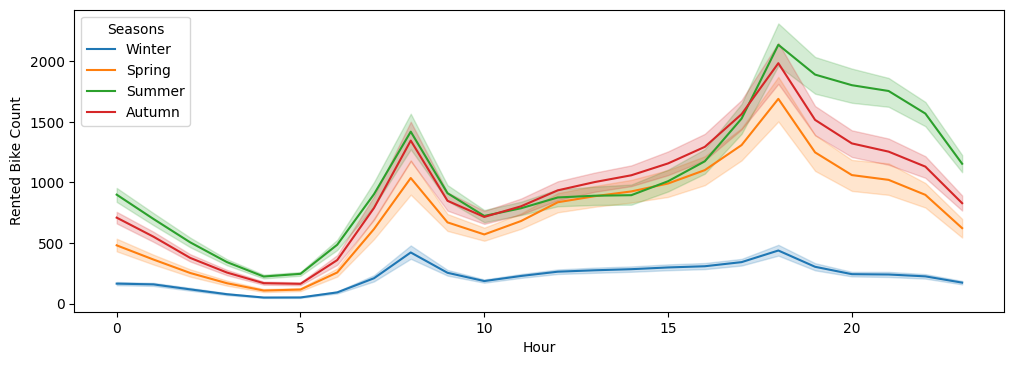

In [338]:
plt.figure(figsize=(12,4), dpi=100)
graph = sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")


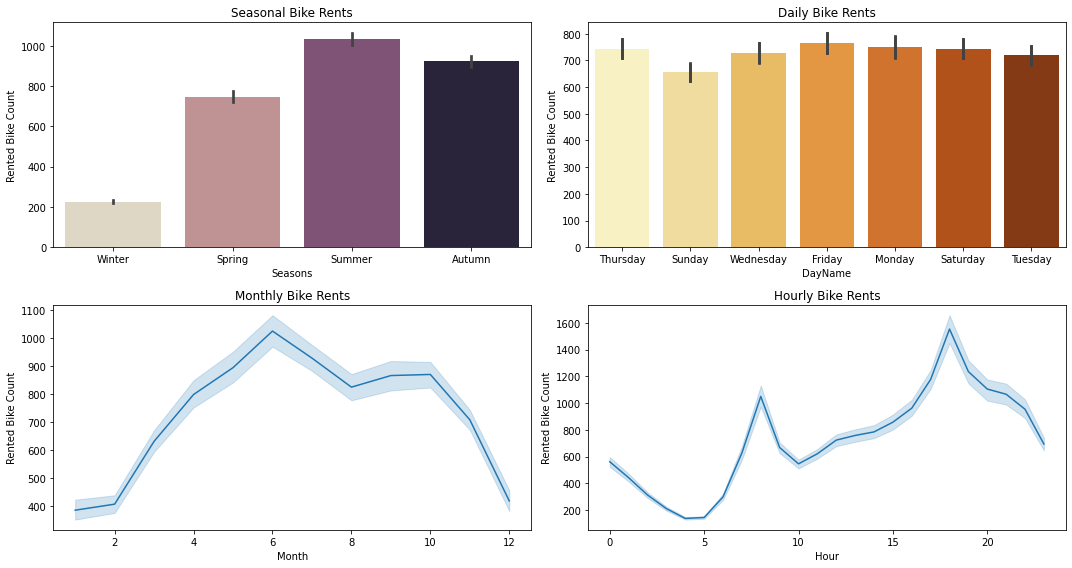

In [339]:
df['DayName'] = df['Date'].dt.day_name()
x = [['Seasons', 'DayName'], ['Month', 'Hour']]
title = [['Seasonal Bike Rents', 'Daily Bike Rents'], 
         ['Monthly Bike Rents', 'Hourly Bike Rents']]

f, ax = plt.subplots(2,2,figsize=(15,8))

for i in range(2):
    for j in range(2):
        if i==0:
            sns.barplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j], palette='ch:s=-.2,r=.6')
            if j==1:
                sns.barplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j], palette='YlOrBr')

        else:
            sns.lineplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j])

        ax[i][j].set_title(title[i][j])

plt.tight_layout()

## Paring distributions


In [340]:
def corr_heatmap(df):    
    plt.figure(figsize=(8,8))

    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='icefire')

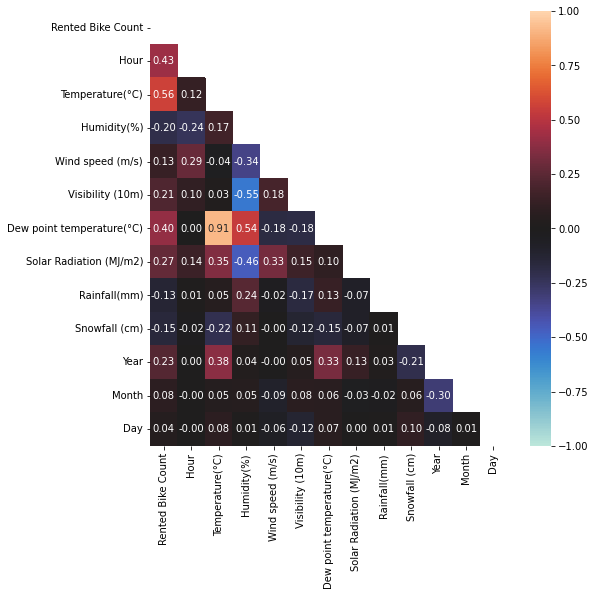

In [341]:
corr_heatmap(df)

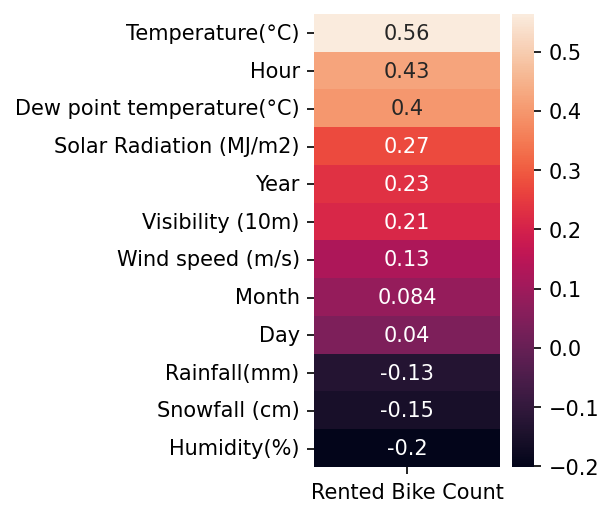

In [342]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)

In [343]:
#sns.pairplot(df)

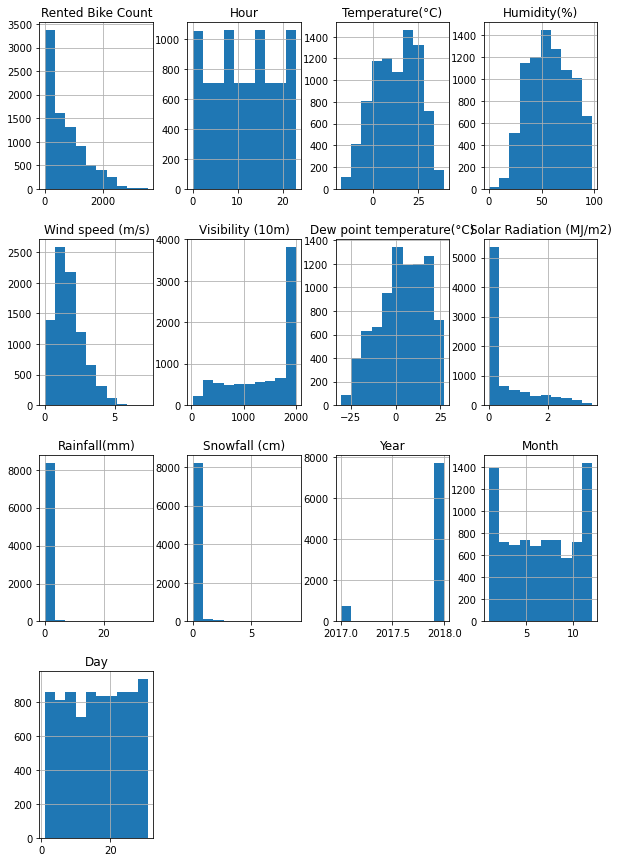

In [344]:
df.hist(figsize=(10,15));

In [345]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'DayName'],
      dtype='object')

In [346]:
X = df.drop(columns='Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [347]:
# Encoding
le = LabelEncoder()
categ = ['Holiday', 'Functioning Day', 'Seasons']
X[categ] = X[categ].apply(le.fit_transform)

In [348]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [349]:
# def outlier(x):
#     high=0
#     q1 = x.quantile(.25)
#     q3 = x.quantile(.75)
#     iqr = q3-q1
#     low = q1-1.5*iqr
#     high += q3+1.5*iqr
#     outlier = (x.loc[(x < low) | (x > high)])
#     return(outlier)
# outlier(df['Rented Bike Count']).count()
# ## The Above Code will return this output

# Data Processing

In [350]:
df['Date'] = pd.to_datetime(df['Date'])

In [351]:
df['WeekDay']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month

In [352]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,DayName,WeekDay,WeekDayEncoding
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,Thursday,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,Thursday,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,Thursday,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,Thursday,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,Thursday,4


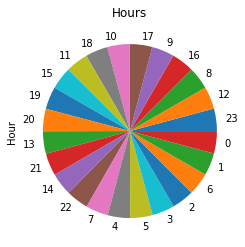

In [158]:
plt.title("Hours")
df['Hour'].value_counts().plot(kind='pie')
plt.show()


In [353]:
df.drop(columns=['DayName','WeekDay','Date','Year', 'Month', 'Day','Functioning Day','DayName','WeekDay',
                 'WeekDayEncoding','Solar Radiation (MJ/m2)','Dew point temperature(°C)','Humidity(%)'], axis = 1, inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,2.2,2000,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,0.8,2000,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,1.0,2000,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,0.9,2000,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,2.3,2000,0.0,0.0,Winter,No Holiday


In [408]:
df = df.rename(columns={'Rented Bike Count': 'rented_bike_count', 'Hour': 'hour','Temperature(°C)':'temperature',
                        'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall',
                        'Seasons':'seasons','Holiday':'holiday'})
df.head()

,rented_bike_count,hour,temperature,wind_speed,visibility,rainfall,snowfall,seasons,holiday
0,254,0,-5.2,2.2,2000,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,0.8,2000,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,1.0,2000,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,0.9,2000,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,2.3,2000,0.0,0.0,Winter,No Holiday


## One-hot encoding

In [409]:
df_one_hot_coded = pd.get_dummies(df,columns=['seasons','holiday', ],prefix='C')

In [410]:
df_one_hot_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8465 non-null   int64  
 1   hour               8465 non-null   int64  
 2   temperature        8465 non-null   float64
 3   wind_speed         8465 non-null   float64
 4   visibility         8465 non-null   int64  
 5   rainfall           8465 non-null   float64
 6   snowfall           8465 non-null   float64
 7   C_Autumn           8465 non-null   uint8  
 8   C_Spring           8465 non-null   uint8  
 9   C_Summer           8465 non-null   uint8  
 10  C_Winter           8465 non-null   uint8  
 11  C_Holiday          8465 non-null   uint8  
 12  C_No Holiday       8465 non-null   uint8  
dtypes: float64(4), int64(3), uint8(6)
memory usage: 898.7 KB


In [454]:
df_one_hot_coded = df_one_hot_coded.rename(columns={'C_No Holiday': 'C_No_Holiday'})
df_one_hot_coded.head()

,rented_bike_count,hour,temperature,wind_speed,visibility,rainfall,snowfall,C_Autumn,C_Spring,C_Summer,C_Winter,C_Holiday,C_No_Holiday
0,254,0,-5.2,2.2,2000,0.0,0.0,0,0,0,1,0,1
1,204,1,-5.5,0.8,2000,0.0,0.0,0,0,0,1,0,1
2,173,2,-6.0,1.0,2000,0.0,0.0,0,0,0,1,0,1
3,107,3,-6.2,0.9,2000,0.0,0.0,0,0,0,1,0,1
4,78,4,-6.0,2.3,2000,0.0,0.0,0,0,0,1,0,1


In [498]:
df_one_hot_coded['C_Holiday'].value_counts()

0    8057
1     408
Name: C_Holiday, dtype: int64

# Model

In [455]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [456]:
#features & target
X = df_one_hot_coded.drop(columns=['rented_bike_count'],axis=1)
y = df_one_hot_coded['rented_bike_count']

In [457]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [458]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 8691 to 7469
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hour          6772 non-null   int64  
 1   temperature   6772 non-null   float64
 2   wind_speed    6772 non-null   float64
 3   visibility    6772 non-null   int64  
 4   rainfall      6772 non-null   float64
 5   snowfall      6772 non-null   float64
 6   C_Autumn      6772 non-null   uint8  
 7   C_Spring      6772 non-null   uint8  
 8   C_Summer      6772 non-null   uint8  
 9   C_Winter      6772 non-null   uint8  
 10  C_Holiday     6772 non-null   uint8  
 11  C_No_Holiday  6772 non-null   uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 410.0 KB


In [459]:
model = LinearRegression()

In [460]:
model.fit(X_train,y_train)

LinearRegression()

In [461]:
print(model.intercept_)


-227.59068514148908


In [462]:
model.coef_

array([ 3.20367868e+01,  2.53723485e+01,  2.17135719e+01,  1.35705246e-01,
       -8.24804517e+01, -9.96248675e+00,  1.44606766e+02,  3.27673422e+01,
       -4.75313937e+01, -1.29842714e+02, -5.74949726e+01,  5.74949726e+01])

In [463]:
pd.DataFrame(model.coef_,X.columns, columns=['Coefficient'])

,Coefficient
hour,32.036787
temperature,25.372348
wind_speed,21.713572
visibility,0.135705
rainfall,-82.480452
snowfall,-9.962487
C_Autumn,144.606766
C_Spring,32.767342
C_Summer,-47.531394
C_Winter,-129.842714


In [464]:
predictions = model.predict(X_test)

In [465]:
predictions

array([1534.77820344, 1105.32098339, 1479.55685311, ...,  348.50589761,
       1016.72622091, 1288.84895068])

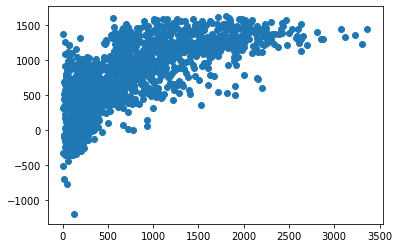

In [466]:
plt.scatter(y_test,predictions);

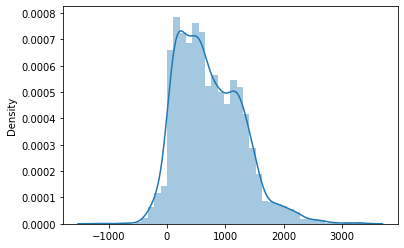

In [467]:
sns.distplot((y_test,predictions));

In [468]:
#Evaluation metrics
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ",metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2: {}".format(model.score(X_test, y_test)))

MAE:  323.9606152952192
MSE:  182820.25519119503
RMSE:  427.57485331950363
R^2: 0.5343183750523306


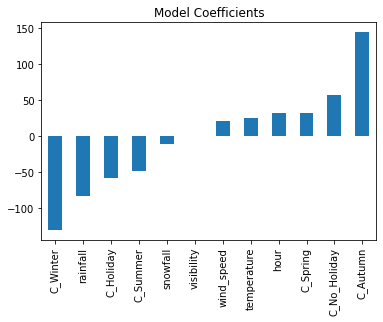

In [469]:
predictors = X_train.columns

coef = Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients');



# Regularization

#**LASSO** (Least Absolute Shrinkage Selector Operator)

In [470]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV



In [471]:
# lasso_model = Lasso(alpha = 0.5)
# lasso_model.fit(X_train, y_train)

In [472]:
pd.DataFrame(lasso.coef_,X.columns, columns=['Coefficient'])

,Coefficient
hour,3.203694e+01
temperature,2.537261e+01
wind_speed,2.170656e+01
visibility,1.357089e-01
rainfall,-8.247605e+01
snowfall,-9.939626e+00
C_Autumn,1.920961e+02
C_Spring,8.026560e+01
C_Summer,-0.000000e+00
C_Winter,-8.231197e+01


In [473]:
test_set_pred = lasso.predict(X_test)
test_set_pred

array([1534.79257007, 1105.33274746, 1479.57670429, ...,  348.53585018,
       1016.74163193, 1288.83454528])

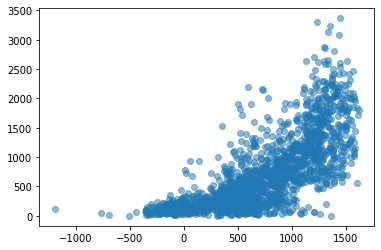

In [474]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(10,-2,100));

In [475]:
lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)


In [476]:

print("MSE: ",metrics.mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))


MSE:  186116.16825941674
RMSE:  431.41183138552975


In [477]:
lassoReg.score(X_test,y_test)

0.5259229915556245

#**RIDGE**

In [478]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

In [479]:
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ",metrics.mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R^2: {}".format(model.score(X_test, y_test)))

MAE:  323.3309122601071
MSE:  182862.18183393966
RMSE:  427.62387893327434
R^2: 0.5343183750523306


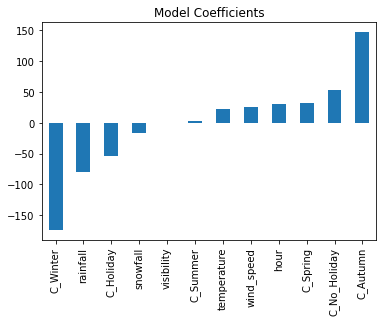

In [480]:
predictors = X_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients');

In [481]:
ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

In [482]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MSE: ",metrics.mean_squared_error(y_test, pred))

RMSE:  442.2031481156279
MSE:  195543.624203372


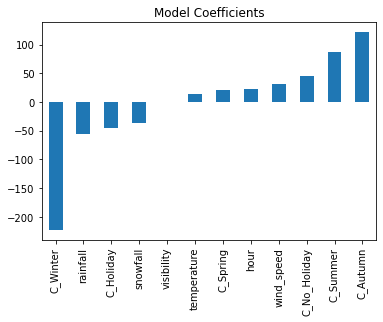

In [483]:
predictors = X_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients');

In [484]:
ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

In [485]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MSE: ",metrics.mean_squared_error(y_test, pred))

RMSE:  545.559063745746
MSE:  297634.692035135


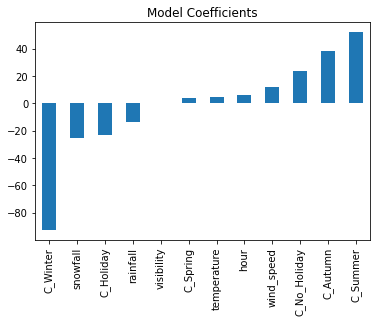

In [486]:
predictors = X_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients');

In [487]:
pd.DataFrame(ridgeReg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
hour,6.307158
temperature,4.270895
wind_speed,11.889369
visibility,0.033052
rainfall,-13.527912
snowfall,-25.531441
C_Autumn,38.294900
C_Spring,4.056171
C_Summer,52.004043
C_Winter,-92.730314


**LASSO**:

**Pro**: great for trimming features and focusing interpretation on a few key ones

**Con**: risk of discarding features that are actually useful

**Ridge**:

**Pro**: great for smoothly handling multicollinearity, very nice when working with sparse features

**Con**: will never fully discard features

# **MODEL TUNNING**

In [499]:
df_one_hot_coded.drop(columns=['C_No_Holiday','C_Holiday'], inplace=True)

In [501]:
X = df_one_hot_coded.drop(columns=['rented_bike_count'],axis=1)
y = df_one_hot_coded['rented_bike_count']

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [504]:
X.columns

Index(['hour', 'temperature', 'wind_speed', 'visibility', 'rainfall',
       'snowfall', 'C_Autumn', 'C_Spring', 'C_Summer', 'C_Winter'],
      dtype='object')

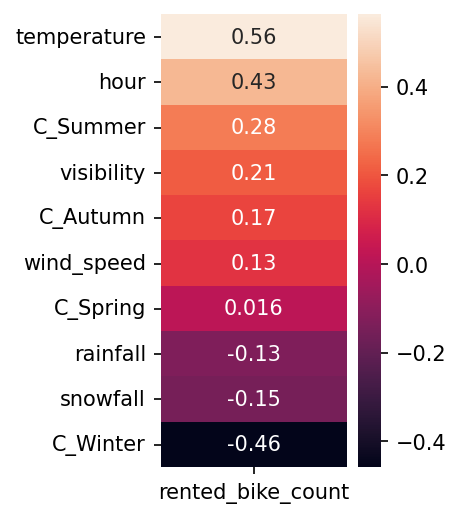

In [505]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(df_one_hot_coded.corr()[["rented_bike_count"]].sort_values
            (by="rented_bike_count", ascending=False)[1:],annot=True);

## Random Forest

In [506]:
# Building Random Forest Model 

rf_model = RandomForestRegressor(
        random_state=42,
        max_features=7,
        min_samples_split=2,
        min_samples_leaf=2,
        n_estimators=100,
        max_depth=21
    
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=21, max_features=7, min_samples_leaf=2,
                      random_state=42)

In [507]:
y_pred_train_rf = rf_model.predict(X_train)
print('Random Forest - Training Metrics')
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train_rf))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_rf))
print('R2:', cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Random Forest - Training Metrics
MAE: 86.74656044256244
MSE: 20179.81129520518
R2: 0.8357170036303195


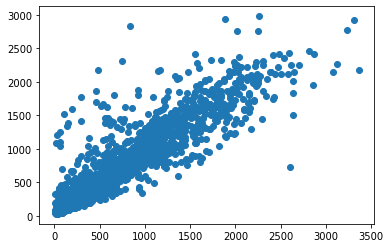

In [508]:
plt.scatter(y_test,rf_model.predict(X_test));

In [509]:
#X_train.to_csv("seoulBike.csv", encoding='utf-8',index = False)

In [510]:
# saving the model 
import pickle 
pickle_out = open("rf_model", mode = "wb") 
pickle.dump(rf_model, pickle_out) 
pickle_out.close()

In [511]:
# load saved model
with open('rf_model' , 'rb') as f:
    lr = pickle.load(f)

In [512]:
# check prediction
lr.predict(X_test)

array([1209.59594048, 1153.27776103, 1247.29016667, ...,   89.46798413,
       1284.54396831, 1632.10557143])

**Conclusion**

We have analyzed Seoul city bike sharing dataset. Through analysis, we saw that in general the number of bike rents in 2018 was more than in 2017. The highest number of bike rents occur in summer while the least bike rents occur in winter. In daily basis, the trend of bike rents is almost similar with slight peaking demands on Thursday while drops on Sunday. 

Based on this analysis, we built an Random Forest model to predict the number of bike rents. We made new features such as hour and month derived from the dates. We achieved an R2 accuracy of 86.09 % based on 5-folds CV. Finally, it was found that hour and temperature are the most determining predictors.